In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing  import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-course-data/ion.csv
/kaggle/input/dl-course-data/spotify.csv
/kaggle/input/dl-course-data/forestfires.csv
/kaggle/input/dl-course-data/songs.csv
/kaggle/input/dl-course-data/abalone.csv
/kaggle/input/dl-course-data/concrete.csv
/kaggle/input/dl-course-data/fuel.csv
/kaggle/input/dl-course-data/red-wine.csv
/kaggle/input/dl-course-data/hotel.csv
/kaggle/input/dl-course-data/diamonds.csv
/kaggle/input/dl-course-data/candy.csv
/kaggle/input/dl-course-data/cereal.csv
/kaggle/input/dl-course-data/housing.csv


In [2]:
df = pd.read_csv('../input/dl-course-data/abalone.csv')

In [3]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['Age'] = df['Rings']+1.5

In [6]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [9]:
le = LabelEncoder()
cat_col = df['Type']
df['Type']=le.fit_transform(cat_col)

In [12]:
df['Type'][0:20]

0     2
1     2
2     0
3     2
4     1
5     1
6     0
7     0
8     2
9     0
10    0
11    2
12    2
13    0
14    0
15    2
16    1
17    0
18    2
19    2
Name: Type, dtype: int64

In [13]:
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [14]:
X = df.drop(['Age'],axis = 1)
y= df['Age']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 44)

In [15]:
X

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [20]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [22]:
knn=KNeighborsRegressor()
knn_model = knn.fit(X_train,y_train)

In [23]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params

In [24]:
dir(knn)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params

In [25]:
y_pred = knn_model.predict(X_test)

In [26]:
y_pred

array([ 9.5,  9.5, 10.5, 13.5,  9.5, 11.5,  6.5, 15.5, 10.5,  8.5, 18.5,
       11.5, 12.5, 11.5, 17.3,  9.5,  9.5,  7.5, 14.5, 11.5,  8.5, 10.5,
       12.5, 12.5, 18.5, 13.5, 10.5, 11.5,  7.5,  8.5,  9.5,  7.5, 11.5,
       10.5, 11.5,  8.5, 10.5, 11.5,  9.5, 16.5, 10.5,  8.5, 12.5, 12.5,
       22.7,  9.5, 13.5, 11.5,  8.5,  8.5,  7.5, 12.5, 13.5, 11.5, 15.5,
       12.5, 14.5, 11.5,  8.5, 15.5, 11.5,  8.5, 10.5, 15.5,  8.5,  5.5,
       24.1, 14.5,  9.5,  6.5,  5.5, 13.5, 15.5, 10.5, 13.5,  4.5, 15.5,
       12.5, 10.5,  6.5, 12.5, 15.5, 14.5, 10.5, 17.5, 10.5, 10.5,  9.5,
       20.5, 14.5, 12.5,  9.5, 11.5,  7.5, 10.5, 10.5,  9.5, 10.5, 10.5,
       10.5,  7.5,  8.5, 13.5, 19.5, 10.5,  6.5, 12.5,  8.5,  9.5, 12.5,
       11.5, 10.5, 12.5,  7.5, 12.5, 12.5,  5.5, 14.5, 15.5, 13.5, 12.5,
        7.5, 12.5, 12.5, 11.5, 10.5, 11.5, 11.5,  8.5,  7.5, 15.5,  7.5,
       19.5, 20.5, 10.5,  9.5,  6.5, 10.5,  8.5, 19.5, 10.5, 12.5,  6.5,
       12.5, 10.5,  6.5, 14.5,  9.5, 12.5, 10.5, 16

In [27]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.0448282207765424

In [32]:
RMSE = []
for k in range (15):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)  
    rmse_for_all_k = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse_for_all_k)
    print("K = ",k," değeri icin rmse degeri : ",rmse_for_all_k)

K =  1  değeri icin rmse degeri :  0.048911598804451846
K =  2  değeri icin rmse degeri :  0.03458572319330373
K =  3  değeri icin rmse degeri :  0.02577867603707277
K =  4  değeri icin rmse degeri :  0.031175149593115188
K =  5  değeri icin rmse degeri :  0.0448282207765424
K =  6  değeri icin rmse degeri :  0.054380176674026684
K =  7  değeri icin rmse degeri :  0.060713783118823535
K =  8  değeri icin rmse degeri :  0.0759951915502289
K =  9  değeri icin rmse degeri :  0.08695395343013664
K =  10  değeri icin rmse degeri :  0.07894338107953025
K =  11  değeri icin rmse degeri :  0.08713342514518592
K =  12  değeri icin rmse degeri :  0.09213848417363973
K =  13  değeri icin rmse degeri :  0.1016204596358251
K =  14  değeri icin rmse degeri :  0.1081632883360054
K =  15  değeri icin rmse degeri :  0.11412706387705435


In [38]:
knn_params = {"n_neighbors":np.arange(1,30,1)}
knn= KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [39]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [41]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_['n_neighbors']).fit(X_train,y_train)

In [42]:
y_pred1 = knn_tuned.predict(X_test)

In [43]:
y_pred1

array([ 9.5       ,  9.5       , 10.5       , 13.5       ,  9.5       ,
       11.5       ,  6.5       , 15.5       , 10.5       ,  8.5       ,
       18.5       , 11.5       , 12.5       , 11.5       , 17.5       ,
        9.5       ,  9.5       ,  7.5       , 14.5       , 11.5       ,
        8.5       , 10.5       , 12.5       , 12.5       , 18.5       ,
       13.5       , 10.5       , 11.5       ,  7.5       ,  8.5       ,
        9.5       ,  7.5       , 11.5       , 10.5       , 11.5       ,
        8.5       , 10.5       , 11.5       ,  9.5       , 16.5       ,
       10.5       ,  8.5       , 12.5       , 12.5       , 22.5       ,
        9.5       , 13.5       , 11.5       ,  8.5       ,  8.5       ,
        7.5       , 12.5       , 13.5       , 11.5       , 15.5       ,
       12.5       , 14.5       , 11.5       ,  8.5       , 15.5       ,
       11.5       ,  8.5       , 10.5       , 15.5       ,  8.5       ,
        5.5       , 24.5       , 14.5       ,  9.5       ,  6.5 

In [44]:
rmse_for_knn_tuned = np.sqrt(mean_squared_error(y_test,y_pred1))
rmse_for_knn_tuned

0.02577867603707277

# **Otomatik atanan K=5 değeri isin Rmse ve tuned edilmiş işlemle bulunmuş K değerinin Rmse değerlerini karşılaştırılması**


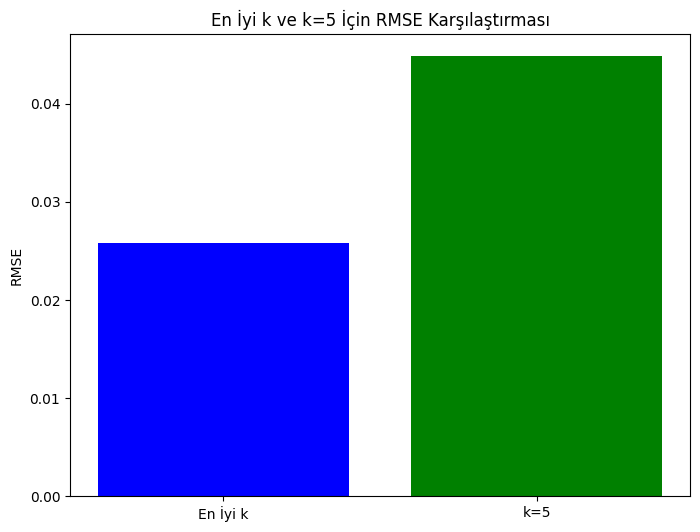

In [46]:
k_values = ['En İyi k', 'k=5']
rmse_values = [rmse_for_knn_tuned, rmse]

plt.figure(figsize=(8, 6))
plt.bar(k_values, rmse_values, color=['blue', 'green'])
plt.title('En İyi k ve k=5 İçin RMSE Karşılaştırması')
plt.ylabel('RMSE')
plt.show()

# **Gerçek ve Tahmin edilen değerlerin karşılaştırılması**


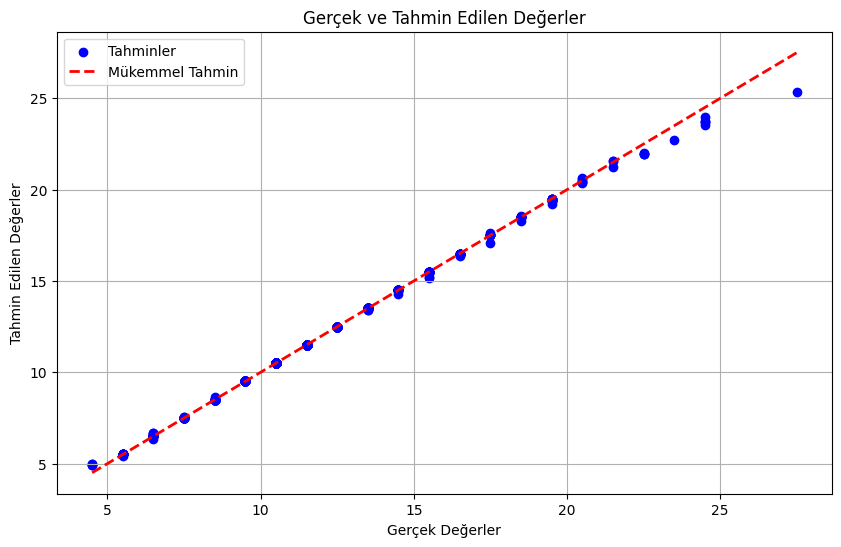

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Mükemmel Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()